In [8]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('GOAT.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img_rgb)

alto, ancho, _ = img_rgb.shape
print(f"Alto: {alto} Ancho: {ancho}")

[[[ 70  78  81]
  [ 71  79  82]
  [ 72  80  83]
  ...
  [ 71  71  81]
  [ 71  71  81]
  [ 67  67  79]]

 [[ 71  79  82]
  [ 72  80  83]
  [ 73  81  84]
  ...
  [ 70  70  80]
  [ 71  71  81]
  [ 67  67  79]]

 [[ 72  80  83]
  [ 73  81  84]
  [ 74  82  85]
  ...
  [ 70  70  80]
  [ 70  70  80]
  [ 67  67  79]]

 ...

 [[110  82  61]
  [106  78  57]
  [107  76  58]
  ...
  [146 144 155]
  [146 144 155]
  [147 147 157]]

 [[108  79  61]
  [105  76  58]
  [107  75  60]
  ...
  [144 142 153]
  [145 143 154]
  [145 145 155]]

 [[108  80  68]
  [104  76  64]
  [106  74  61]
  ...
  [147 145 156]
  [146 144 155]
  [135 135 145]]]
Alto: 225 Ancho: 225


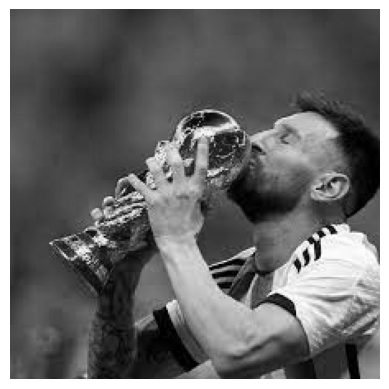

In [9]:
gray_matix = []

with open('info_GOAT.txt', 'w') as f:
    for i in range(alto):
        row = []
        for j in range(ancho):
            r, g, b = img_rgb[i, j]
            avg = (int(r) + int(g) + int(b)) // 3
            row.append(avg)
            f.write(f"{avg} ")
        gray_matix.append(row)
        f.write('\n')
    f.close()

plt.imshow(gray_matix, cmap='gray')
plt.axis('off')
plt.show()

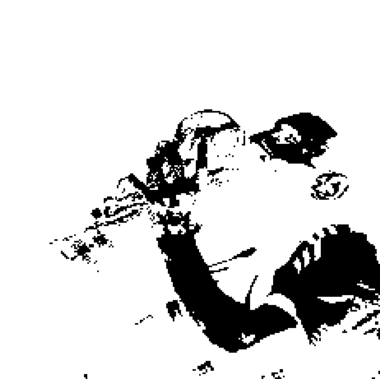

In [11]:
threshold = 150
binary_matrix = []

with open('info_GOAT.txt', 'r') as f_in, open('info_GOAT_bin.txt', 'w') as f_out:
    for line in f_in:
        row = [int(x) for x in line.split()]
        binary_row = [1 if x > threshold else 0 for x in row]

        binary_matrix.append(binary_row)
        f_out.write(' '.join(str(x) for x in binary_row) + '\n')

    f_in.close()
    f_out.close()

plt.imshow(binary_matrix, cmap='binary')
plt.axis('off') 
plt.show()

El centro de masa esta en (147.52130085203407, 144.3033721348854)


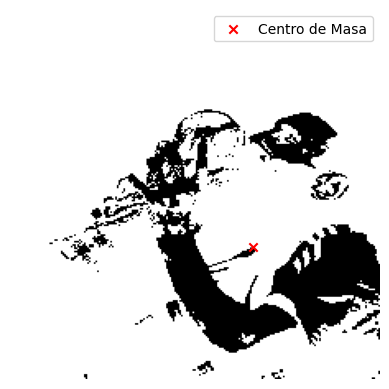

In [7]:
import numpy as np

binary_np = np.array(binary_matrix)

y, x = np.indices(binary_np.shape)
center_of_mass = np.average(x, weights=binary_np), np.average(y, weights=binary_np)

print(f"El centro de masa esta en {center_of_mass}")

plt.imshow(binary_matrix, cmap='binary')
plt.scatter(center_of_mass[0], center_of_mass[1], color='red', marker='x', label='Centro de Masa')
plt.legend()
plt.axis('off')
plt.show()